In [230]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import scipy as sp

In [231]:
def read_to_df(path):
    # Start reading from the row after #DATA
    data_start_line = None
    with open(path, 'r') as file:
        for i, line in enumerate(file):
            if "#DATA" in line:
                data_start_line = i + 1  
                break


    df = pd.read_csv(path, skiprows=data_start_line, delimiter='\t', header=None)
    return df

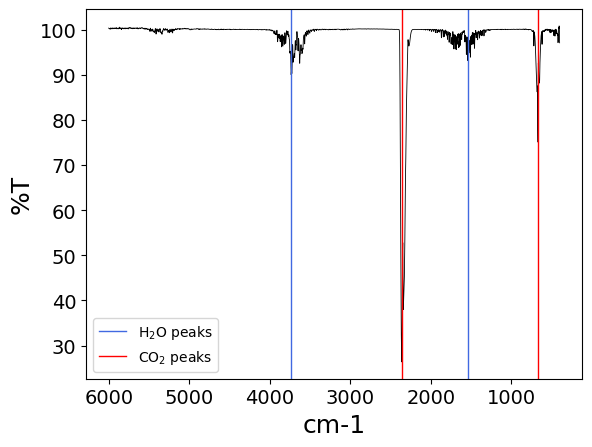

In [232]:
file_path_CO2 = './data/CO2.asc'  
CO2 = read_to_df(file_path_CO2).to_numpy()
peaksH2O, _ = sp.signal.find_peaks(-CO2[:,1], height=[-95,-90], distance= 200)
peaksCO2, _ = sp.signal.find_peaks(-CO2[:,1], height= -80, distance= 500)

plt.gca().invert_xaxis()
plt.ylabel("%T")
plt.xlabel("cm-1")
plt.plot(CO2[:,0], CO2[:, 1], color = "black", linewidth = 0.6)
# plt.scatter(CO2[peaksH2O,0], CO2[peaksH2O,1], s=200 , marker="*",facecolors='none', edgecolors='forestgreen',zorder = 3,linewidths=2.5, label = "H$_2$O peaks")
# plt.scatter(CO2[peaksCO2,0], CO2[peaksCO2,1], s=100 , marker="s", facecolors='none', edgecolors='r', zorder = 3,linewidths=2.5, label = "CO$_2$ peaks")
plt.axvline(CO2[peaksH2O[0],0],label = "H$_2$O peaks", color = "royalblue", linewidth = 1)
plt.axvline(CO2[peaksH2O[1],0], color = "royalblue", linewidth = 1)
plt.axvline(CO2[peaksCO2[0],0],label = "CO$_2$ peaks", color = "red", linewidth = 1)
plt.axvline(CO2[peaksCO2[1],0], color = "red", linewidth = 1)

plt.legend()

plt.savefig("./plots/CO2.png")

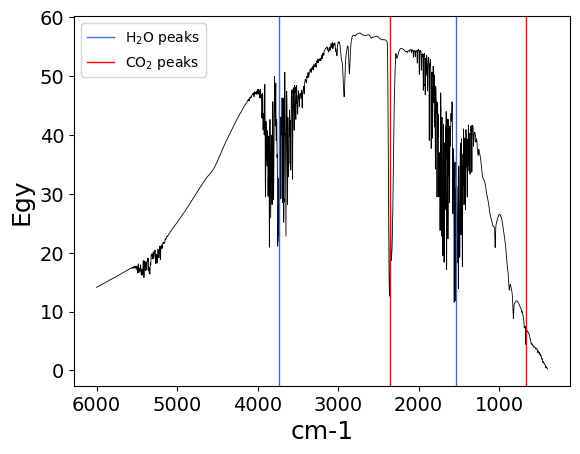

In [233]:
file_path_bg = './data/background.asc'  
bg = read_to_df(file_path_bg).to_numpy()
plt.gca().invert_xaxis()
# plt.title("Background")
plt.ylabel("Egy")
plt.xlabel("cm-1")
plt.plot(bg[:,0], bg[:,1], color = "black", linewidth = 0.6)
plt.axvline(CO2[peaksH2O[0],0],label = "H$_2$O peaks", color = "royalblue", linewidth = 1)
plt.axvline(CO2[peaksH2O[1],0], color = "royalblue", linewidth = 1)
plt.axvline(CO2[peaksCO2[0],0],label = "CO$_2$ peaks", color = "red", linewidth = 1)
plt.axvline(CO2[peaksCO2[1],0], color = "red", linewidth = 1)
plt.legend()
plt.savefig("./plots/bg.png")

[2926. 2858. 1714. 1466.  730.]


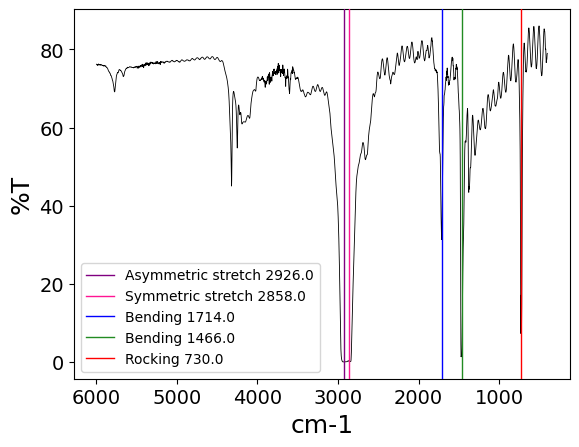

In [234]:
file_path_PE = './data/PE.asc'  
PE = read_to_df(file_path_PE).to_numpy()

peaksPE, _ = sp.signal.find_peaks(-PE[:,1], height=-40, distance=20)

# plt.title("PE")
plt.gca().invert_xaxis()
plt.ylabel("%T")
plt.xlabel("cm-1")
plt.plot(PE[:, 0], PE[:, 1], color = "black", linewidth = 0.6)
plt.axvline(PE[peaksPE[0],0], color='purple',zorder = 3, label = f"Asymmetric stretch {PE[peaksPE[0],0]}", linewidth = 1)
plt.axvline(PE[peaksPE[1],0], color='deeppink',zorder = 3, label = f"Symmetric stretch {PE[peaksPE[1],0]}", linewidth = 1)
plt.axvline(PE[peaksPE[2],0], color='blue',zorder = 3, label = f"Bending {PE[peaksPE[2],0]}", linewidth = 1)
plt.axvline(PE[peaksPE[3],0], color='forestgreen',zorder = 3, label = f"Bending {PE[peaksPE[3],0]}", linewidth = 1)
plt.axvline(PE[peaksPE[4],0], color='red',zorder = 3, label = f"Rocking {PE[peaksPE[4],0]}", linewidth = 1)

plt.legend()
print(PE[peaksPE,0])
plt.savefig("./plots/PE.png")

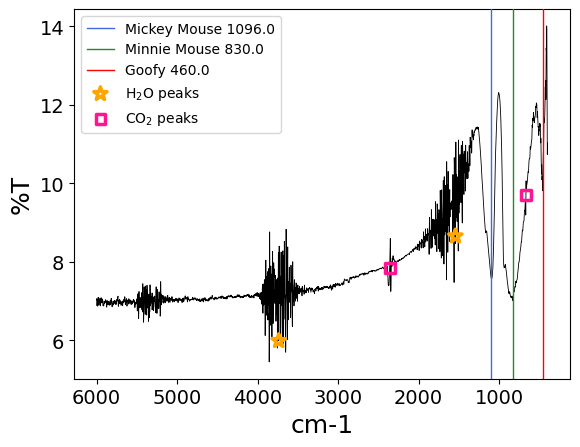

In [235]:
file_path_SiC = './data/SiC.asc'  
SiC = read_to_df(file_path_SiC).to_numpy()
peaksSiC, _ = sp.signal.find_peaks(-SiC[:,1], height=-10, distance = 90)
peaksSiC = peaksSiC[-3:]

# plt.title("SiC")
plt.ylabel("%T")
plt.xlabel("cm-1")

plt.gca().invert_xaxis()
plt.plot(SiC[:, 0], SiC[:, 1], color = "black", linewidth = 0.6)
plt.axvline(SiC[peaksSiC[0],0], color='royalblue',zorder = 3, label = f"Mickey Mouse {SiC[peaksSiC[0],0]}", linewidth = 1)
plt.axvline(SiC[peaksSiC[1],0], color='forestgreen',zorder = 3, label = f"Minnie Mouse {SiC[peaksSiC[1],0]}", linewidth = 1)
plt.axvline(SiC[peaksSiC[2],0], color='red',zorder = 3, label = f"Goofy {SiC[peaksSiC[2],0]}", linewidth = 1)
plt.scatter(CO2[peaksH2O-2,0], SiC[peaksH2O-2,1], s=100 , marker="*",facecolors='none', edgecolors='orange',zorder = 3,linewidths=2.5, label = "H$_2$O peaks")
plt.scatter(CO2[peaksCO2,0], SiC[peaksCO2,1], s=50 , marker="s", facecolors='none', edgecolors='deeppink', zorder = 3,linewidths=2.5, label = "CO$_2$ peaks")
plt.legend()
plt.savefig("./plots/SiC.png")